<a href="https://colab.research.google.com/github/mahoryu/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
# TODO - code!

###1) Write Function

You should only truly need these three values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

In [0]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [0]:
prior = 1/1000 # prior knowledge
fpr = .08      # false positive rate
tpr = 1        # true positive rate

In [0]:
def prob_drunk_given_positive(prior, fpr, tpr, num_tests):
  posterior = prior
  for test in range(0, num_tests):
    # prior belief
    P_drinker = posterior
    # compliment of prior belief
    P_nondrinker = 1 - P_drinker
    # true positive rate
    P_pos_given_drinker = tpr
    # false positive rate
    P_pos_given_nondrinker = fpr
    #therom
    numerator = P_pos_given_drinker * P_drinker
    denom = (P_pos_given_drinker * P_drinker) + (P_pos_given_nondrinker * P_nondrinker)
    posterior = numerator/denom
  return posterior


In [4]:
# probability that user is drunk after one test
prob_drunk_given_positive(prior, fpr, tpr, 1)

0.012357884330202669

In [5]:
# probability that user is drunk after two tests
prob_drunk_given_positive(prior, fpr, tpr, 2)

0.13525210993291495

In [7]:
# How many positive breathalyzer tests are needed in order to have a probability 
#  that's greater than 95% that a person is drunk beyond the legal limit?
prob_drunk_given_positive(prior, fpr, tpr, 4)
# answer is 4.

0.9606895076105054

###2) Explore scipy.stats.bayes_mvs

In [0]:
url='https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv'

In [9]:
df = pd.read_csv(url, na_values=' ?')
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Frequentist:

In [30]:
print(df['age'].mean())
ci_freq=stats.t.interval(.95,
                         len(df['age']),
                         loc=np.mean(df['age']),
                         scale=stats.sem(df['age'])
                         )
print(ci_freq)

38.58164675532078
(38.433482476875845, 38.72981103376572)


####Bayesian:

In [31]:
ci_bayes=stats.bayes_mvs(df['age'], alpha=.95)[0][1]
print(ci_bayes)

(38.433490259580736, 38.72980325106083)


In [0]:
def remove_nan(data):
  data = np.array(data)
  data= data[~np.isnan(data)]
  return data

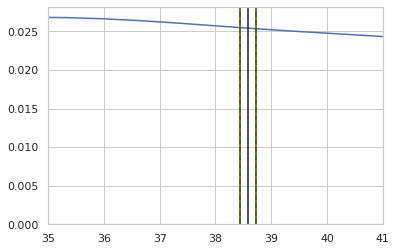

In [79]:
# graph them both
sns.kdeplot(remove_nan(df['age']))
plt.axvline(x=df['age'].mean(), color='k')
plt.axvline(x=ci_freq[0], color='red')
plt.axvline(x=ci_freq[1], color='red')
plt.axvline(x=ci_bayes[0], color='green', linestyle='dashed')
plt.axvline(x=ci_bayes[1], color='green', linestyle='dashed')
plt.xlim(35,41);

''

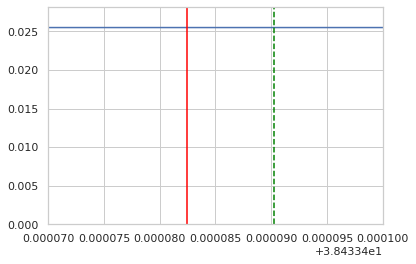

In [80]:
# zoom in to show the difference
sns.kdeplot(remove_nan(df['age']))
plt.axvline(x=df['age'].mean(), color='k')
plt.axvline(x=ci_freq[0], color='red')
plt.axvline(x=ci_freq[1], color='red')
plt.axvline(x=ci_bayes[0], color='green', linestyle='dashed')
plt.axvline(x=ci_bayes[1], color='green', linestyle='dashed')
plt.xlim(38.43347,38.4335)
;

(38, 39)

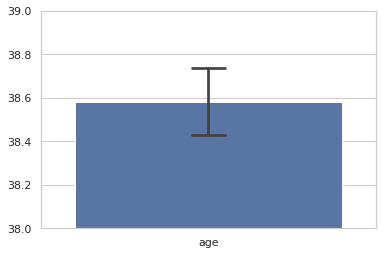

In [86]:
# show it using the seaborn barplot
ax=sns.barplot(data=df[['age']], capsize=.1)
plt.ylim(38,39)

###3) In your own words, summarize the difference between Bayesian and Frequentist statistics

The difference between Bayesian and Frequentist statistics is that Frequentist stats is calculated base on how likely something is going to occure purely based on stats taken of the event's occurance. While Bayesian stats calculates the same thing but also takes into account any prior knowledge on if a related event has/had any effect on the predicted event.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [88]:
# trying out PyMC3
%matplotlib inline
import pymc3 as pm
import theano.tensor as tt

sns.set_context('notebook')
plt.style.use('seaborn-darkgrid')
print("Running on PyMC3 v{}".format(pm.__version__))

Running on PyMC3 v3.7


In [0]:
with pm.Model() as model:
  mu = pm.Normal('mu', mu=0,sigma=1)
  obs = pm.Normal('obs', mu=mu, sigma=1, observed=np.random.randn(100))

In [91]:
model.basic_RVs

[mu, obs]

In [95]:
model.logp({'mu':0})

array(-148.21390192)